## Tweets viejos

In [2]:
import pandas as pd
import re
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import tweepy

from unicodedata import normalize

import time

from matplotlib.font_manager import FontProperties



## MECHI, corre esto si necesitas los tweets de Elio

In [3]:
df_storm = pd.read_csv('tweets.csv', sep= ';')

## La autorización

In [4]:

# Consumer keys and access tokens, used for OAuth
consumer_key = '56jUXGuw12Fg2aHsztCJJZoSU'
consumer_secret = 'f8UEUXfwAeN198l2HNghfYrKGLH7xB888WhS9p3ofJVgEDfKb8'
access_token = '331388192-Lr6itQp6fom5tN5yNy5UP9jey9qake7EkUWqC7lh'
access_token_secret = '8VuGuoMG4Dp5g3AMK9tErdpiFP2Jfxiaa32ZeV4N3DCGM'
 
# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
 
# Creation of the actual interface, using authentication
#api = tweepy.API(auth)

api = tweepy.API(auth,wait_on_rate_limit_notify=True)
time.sleep(1)
# Creates the user object. The me() method returns the user whose authentication keys were used.
user = api.me()
 
print('Name: ' + user.name)
print('Location: ' + user.location)
print('Friends: ' + str(user.friends_count))

Name: Empe
Location: 
Friends: 9


## Funciones de Scrap y diccionario

In [53]:
def scrapeo(hashtag,cantidad=1000,fecha='2017-09-10'):
    message,retweet_count,created_at,user_name,coord,geo,metadata=[],[],[],[],[],[],[]
    i = 0
    tweepy.Status
    for tweet in tweepy.Cursor(api.search,q="#"+str(hashtag),count = cantidad, lang = 'es', since = fecha,tweet_mode='extended').items():
        if 'RT' in tweet.full_text:
            continue
        message.append(tweet.full_text)
        retweet_count.append(tweet.retweet_count)
        created_at.append(tweet.created_at)
        user_name.append(tweet.user.name)
        coord.append(tweet.coordinates)
        geo.append(tweet.geo)
        metadata.append(tweet.metadata)
        i+=1
        if i%1000 == 0: print (i,tweet.full_text)
        if i == 10000: break
    print (len(message),len(retweet_count),len(created_at),len(user_name),len(coord),len(geo))
    df=pd.DataFrame({'Message':message,
                    'Retweet Count':retweet_count,
                    'Created At':created_at,
                    'Username':user_name,
                     'Geo':geo,
                     'Coord':coord,
                     'Metadata':metadata
                    })
    df.to_csv("Twitter_%s.csv"%(hashtag))
    return(df)

    

def diccionario (msj):
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    palabras_borradas = """
    so|o|su|vos|re|pq|le|te|tu|soy|sos|mi|da|n|c|m|o|u|x|s|les|me|d|q|1|2|3|4|5|6|7|8|9|0|e|como|lo|los|mi|
    son|donde|a|el|un|la|una|en|por|para|ante|si|sobre|sin|al|rt|del|y|se|de|que|sus|ha|es|con|esta|ni|no"""
    
    word_to_ix = {}
    word_cant = {}
    emoji = []
    emoji_ix = {}
    emoji_cant = {}

    for i,twit in enumerate(msj):

        txt = pattern.sub('',twit)
        txt = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1",normalize( "NFD", txt), 0, re.I)
        txt = normalize( 'NFC', txt).lower()
        txt = txt.replace('\n','').replace(';','').replace('°','').replace('ñ','n').replace('\ufe0f','').replace('+','').replace('¡','').replace('¿','').replace('?','').replace('▯','').replace('(','').replace('|','').replace('!','').replace(')','').replace('.','').replace('-','').replace('_','').replace(',','').replace('#','').replace(':','')
        tt = txt
        for i in txt:
            if str(i).isascii()==False:
                tt = tt.replace(i,' '+i.encode('unicode-escape').decode('ASCII')+' ')
                emoji.append(i)
        txt = tt
                
        nlist = txt.lower().split(' ')


        for word in nlist:
            
            
            if re.match(palabras_borradas, word):
                continue
            if ('@' in word) and ('RELAMPAGO2018' not in word) and ('RELAMPAGO_edu' not in word) or ('jaj' in word):
                continue

            
            if word not in word_to_ix:
                word_to_ix[word] = len(word_to_ix)
                word_cant[word]  = 1
            else: word_cant[word]+=1
        for emo in emoji:
            if emo not in emoji_ix:
                emoji_ix[emo] = len(emoji_ix)
                emoji_cant[emo]  = 1
            else: emoji_cant[emo]+=1
                
    vocab_size = len(word_to_ix)
    num_labels = 2
    #print(emoji)

    return(word_to_ix,word_cant,emoji_ix,emoji_cant)

def makeImage(text):
    alice_mask = np.array(Image.open("cord.jpeg"))

    wc = WordCloud(background_color="white", max_words=200, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    fig = plt.figure(figsize=(20,20),dpi=100)
    plt.imshow(wc, interpolation="bilinear",cmap=plt.get_cmap("coolwarm"))
    #plt.axis("off")
    plt.tick_params(bottom=False,top=False,left=False,right=False,labelbottom=False,labelleft = False)
    #plt.show()
    plt.savefig('Multiword')

100 Ya las vi a todas mañana #FernandMTY #Lluvia #LluviaMty https://t.co/pzS0wmzs8Q
200 Eso quieres? #lluvia #LluviasMty #LluviaMty #FernandMTY #fernand https://t.co/S9xMpw1kEX
300 Las consecuencias de la #lluvia #homeoffice #Monterrey el desabasto de pan se hace presente y causa estragos en los estomagos https://t.co/8RqMNOqvMo
400 Cásate con una de #Monterrey aguanta frío, calor, viento, #lluvia , #Huracanes , Balaceras... Que no te aguante a ti 🤷‍♀️
500 #Lluvia sorprende a los tijuanenses ☔️
https://t.co/KjXjb6ba9m
600 Por el momento se detectan ecos  de #lluvia moderada a fuerte (amarillo y rojo) y #granizo (rosa y blanco) en #Tlajomulco, #ZMG. También se registran ecos con probabilidad de lluvia en la Región Sierra de Amula y Sur  de #Jalisco. https://t.co/hTAFCG6ASy
700 ATENCIÓN ⚠️🚩

Radar indica intensa #lluvia en la zona Sur de #Monterrey e inmediaciones del cerro de la Silla asociada a banda de precipitación de #Fernand #ClimaMMTV https://t.co/PAe3fM4a1U
800 Pues sí, era obvio

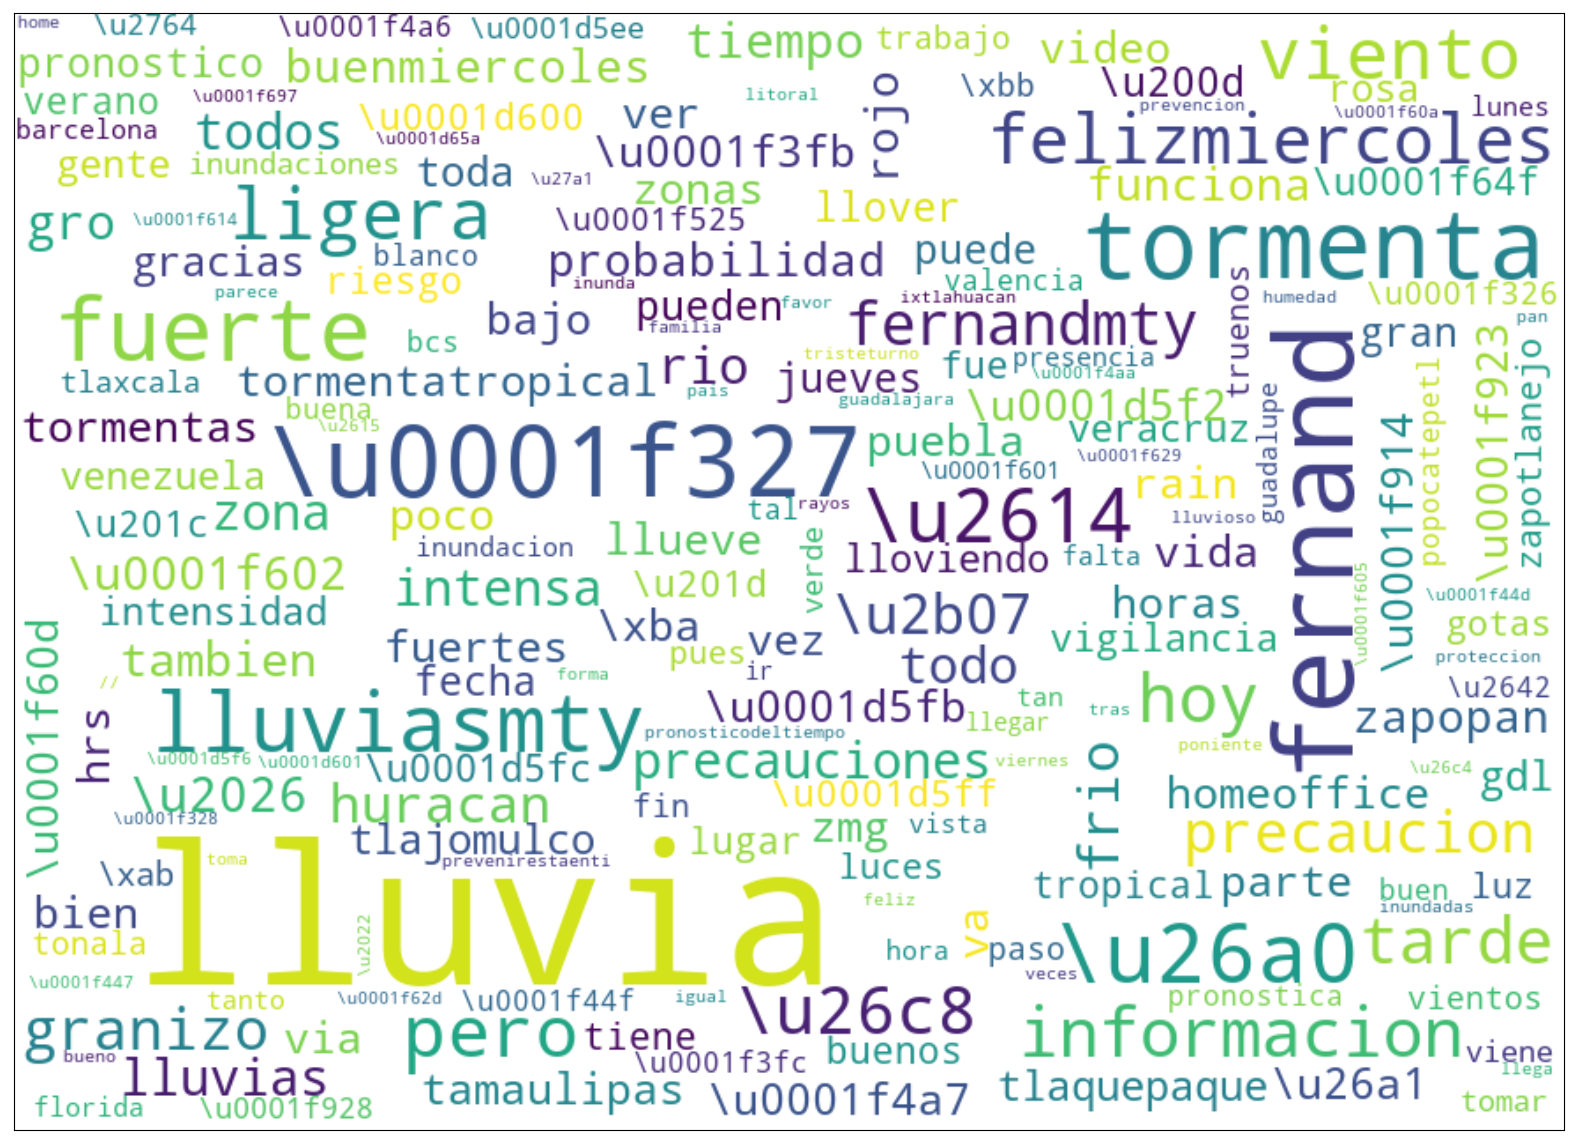

In [7]:
tw = scrapeo('Lluvia')
dic = diccionario(tw['Message'])

im = makeImage(dic[1])

In [9]:

sc = pd.read_csv('Twitter_Lluvia.csv')
dick = diccionario(sc['Message'])
#makeImage(dick[1])


## A esto no le des bola

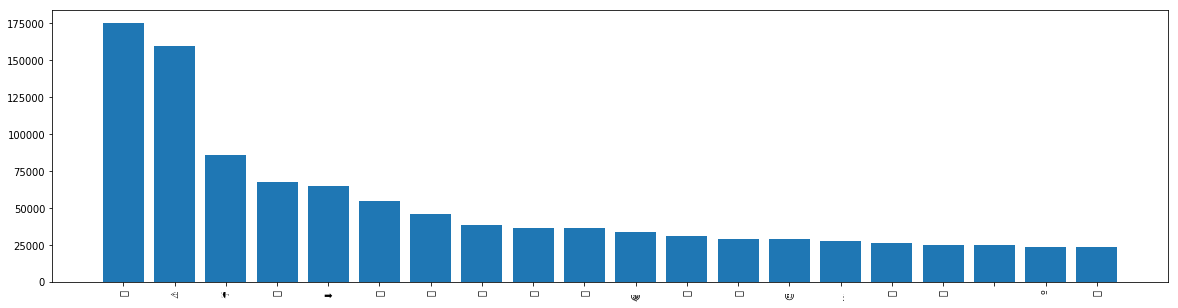

['🌧', '⚠', '☔', '⛈', '⬇', '𝗲', '𝗻', '𝗼', '𝘀', '𝗿', '😂', '💧', '𝗮', '😍', '…', '🏻', '🤔', '\u200d', 'º', '🙏', '⚡', '🤣', '“', '𝗶', '”', '𝘁', '🏼', '♂', '😩', '👇', '☕', '🌦', '❤', '𝗰', '😁', '𝗹', '👏', '𝓪', '🔥', '😅', '👍', '😔', '🤬', '😭', '•', '🚗', '🥺', '😫', '𝘂', '💪', '😮', '⛄', '🏽', '🌀', '🤦', '🇲', '🇽', '«', '😊', '🤨', '😱', '😓', '🚩', '»', '\xa0', '💦', '😋', '😳', '😏', '🌨', '𝓵', '𝓻', '😢', '🤷', '➡', '😎', '✅', '🌪', '𝗱', '🦆', '🖤', '🙊', '📸', '👽', '🎉', '☁', '♀', '𝓮', '𝓾', '😕', '🆘', '🍷', '🚴', '𝗺', '𝗯', '𝗽', '𝗳', '🌊', '🌩', '🥰', '📣', '📡', '😥', '💰', '💲', '☀', '😜', '𝓲', '𝓬', '𝓽', '𝓸', '𝓷', '💃', '🙌', '😬', '🧐', '💻', '👉', '😀', '♥', '♻', '🤭', '💫', '😒', '😃', '🐱', '🚨', '𝗴', '🐶', '📲', '✨', '🐖', '😲', '😣', '😈', '💔', '😪', '🥴', '🌬', '☝', '🤜', '💥', '𝓯', '𝓿', '🙄', '‼', '💚', '🎶', '🌿', '💜', '🚫', '😌', '☂', '🌱', '👊', '📝', '🛶', '🍅', '👌', '’', '🤙', '✌', '🌳', '💨', '🤩', '🐿', '🌮', '🐫', '🐽', '🏋', '😛', '👀', '🐷', '🥧', '🍩', '🌎', '🌚', '📱', '🇨', '🚘', '🌞', '🏡', '🛏', '😉', 'ª', '😰', '💋', '🌂', '🔦', '🚧', '🏾', '💯', '🚔', '😵', '🍃', '𝗗', '𝗔', '𝗾', '

In [15]:
import emoji

emojis = sorted(dick[3].items(),key= lambda  x: x[1],reverse=True)
labels= []
emoticonos = []
frecs = []
for i in emojis:
    emoticonos.append(i[0].encode('utf-16', 'surrogatepass').decode('utf-16'))
    labels.append(emoji.demojize(emoticonos[-1]))
    frecs.append(i[1])
  


prop = FontProperties(fname='emojione-android.ttf')

fig = plt.figure(figsize=(20,5))

p1 = plt.bar(np.arange(len(labels[:20])),frecs[:20])
pr = plt.rcParams['font.family'] = prop.get_family()
#plt.text(5,5,labels[1],)
# Make labels
"""
for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=10,
        #fontproperties = prop
)"""

plt.xticks(np.arange(len(labels[:20])),labels=emoticonos,rotation = 90)
plt.show()
print(emoticonos)

In [165]:
print(plt.get_backend())
plt.use("module://mplcairo.macosx")

module://ipykernel.pylab.backend_inline


AttributeError: module 'matplotlib.pyplot' has no attribute 'use'

In [16]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    print('Empieza a cargar')
    for i,line in enumerate(fin):
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
        if i %100000 == 0: print (i,line)
        if i == 300000: break
    return data

file= './RN/cc.es.300.bin'

In [2]:
f = load_vectors(file)

Empieza a cargar
0 de 0.0547 0.0112 0.1910 0.0308 0.0414 0.0303 -0.0879 -0.0527 0.0158 -0.0857 -0.1319 -0.2033 -0.0272 0.0047 0.1056 0.0051 -0.0890 -0.3369 -0.0298 -0.0366 0.0356 0.0275 -0.2423 0.1990 0.0315 -0.1087 0.4592 0.0319 -0.1572 0.0212 0.0050 -0.0231 0.0420 -0.0044 0.0468 -0.0553 -0.0083 -0.0063 0.1856 -0.0214 -0.0659 0.1750 0.4530 0.0275 0.0539 0.0531 0.1336 0.0242 -0.0144 -0.0746 0.0363 0.0312 -0.1961 0.0324 -0.0214 -0.1861 0.0126 -0.0409 -0.0502 -0.0315 0.0475 0.0140 0.0186 -0.0358 0.0464 0.0748 -0.0725 -0.0742 -0.0061 -0.1204 0.1031 0.0004 -0.0474 0.0104 -0.0050 -0.0299 -0.1193 0.0752 -0.0306 -0.0641 0.0199 0.0514 -0.0097 0.0365 -0.0922 -0.0050 0.0570 0.0035 0.0050 0.0065 -0.0104 0.0397 0.0645 -0.0472 -0.1203 -0.0136 -0.0646 -0.0336 0.0714 0.0133 0.0022 0.0405 0.2487 0.0284 0.0249 0.8094 0.0139 0.0048 0.0428 0.1678 -0.0743 0.0255 0.0638 -0.0347 -0.2788 0.0175 0.0020 -0.0387 -0.1584 -0.2613 0.0080 0.0564 0.2348 0.3009 0.0929 0.0055 -0.1004 0.1165 -0.0227 -0.0534 -0.0325 -0.

In [17]:
import fasttext as ft

model = ft.load_model(file)

In [23]:
df_storm.keys()

Index(['user_id', 'status_id', 'created_at', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'urls_url', 'urls_t.co', 'urls_expanded_url',
       'media_url', 'media_t.co', 'media_expanded_url', 'media_type',
       'ext_media_url', 'ext_media_t.co', 'ext_media_expanded_url',
       'ext_media_type', 'mentions_user_id', 'mentions_screen_name', 'lang',
       'quoted_status_id', 'quoted_text', 'quoted_created_at', 'quoted_source',
       'quoted_favorite_count', 'quoted_retweet_count', 'quoted_user_id',
       'quoted_screen_name', 'quoted_name', 'quoted_followers_count',
       'quoted_friends_count', 'quoted_statuses_count', 'quoted_location',
       'quoted_description', 'quoted_verified', 'retweet_status_id',
       'retweet_text', 'retweet_created_at', 'retweet_source',
       'retweet_favorite_count', 'retweet_retweet_count', 'r

In [52]:
import random as rnd
labels = ['Meteorologico','No meteorologico']

train_size = int(len(df_storm)*0.8)

df_labels = pd.DataFrame([labels[0] for i in range(train_size)])
df_train = pd.DataFrame(rnd.choices(df_storm['text'],k = train_size))


tw = pd.concat([df_train,df_labels],axis = 1)

#train_df = open('data_train.txt','x')

"""
for i in range (len(labels)):
    train_f.write("__label__"+ labels[i] + " " + secc[i] + "\n")
    
labels = []
secc = []
for i in val: 
    labels.append(str(i).split(' ')[-1])
    secc.append(str(i).rsplit(' ', 1)[0])


for i in range (len(labels)):
    val_f.write("__label__"+ labels[i] + " " + secc[i] + "\n")
    """
len(train)
tw

,0,0
0,Es fija que para la barkasa llueve,Meteorologico
1,OTRA VEZ ESTA LLOVIENDO 💦 \nTE ODIO LLUVIA ☔ D...,Meteorologico
2,"En mi casa armaron la pileta, hoy llueve. A sí...",Meteorologico
3,Lluvia querida .,Meteorologico
4,"Me voy a quedar esperando por si se despeja, o...",Meteorologico
5,"Lluvia, auriculares y buena música. No existe ...",Meteorologico
6,"Mojandome en las tormentas , capítulo 88654",Meteorologico
7,"Tendrías que ir parando lluvia, sino voy a com...",Meteorologico
8,Estaba lindo para jugar hoy chee se largó la l...,Meteorologico
9,"Hermosa, cosa preciosa la tormenta😍 https://t....",Meteorologico


In [54]:
scrap_no_met = scrapeo('Rock',cantidad= 10000)

1000 Dia 07 de setembro estaremos no tntpubeer

Em Jales - sp
❤️❤️❤️ #longliverocknroll
#ROADBROTHERS #riopreto #sp #musicariopreto #saojosedoriopreto #festa #banda #rockriopreto #rock #ribeiraopreto #balada #beer… https://t.co/vUq8iAsESB
2000 Esta noche... Vive el Rock en: Calavera Rock Bar de Maracay. Te esperamos! Entrada Libre!

#Venezuela #Maracay #Rock #Concierto #Concert https://t.co/cBmjsoXYUd
3000 Mañana Martes SIMÓN BROTHERS !! Lo mejor de Paul Simon y muchos más clásicos ! A las 22h ! #rock #paulsimon #martes #tuesday #madrid #livemusic #acustico #conciertos #musicaendirecto #barriodelasletras #blackbirdrockbar #barriodelasletras #agosto #music #musica https://t.co/3acIiWuhJV
3083 3083 3083 3083 3083 3083


In [73]:
tw_nm = pd.read_csv('Twitter_Rock.csv')

train_size = int(len(tw_nm)*0.8)

df_labels = pd.DataFrame([labels[1] for i in range(train_size)])
df_train = pd.DataFrame(rnd.choices(tw_nm['Message'],k = train_size))


tw_nmm = pd.concat([df_train,df_labels],axis = 1)
tw_nmm

tw_train = pd.concat([tw,tw_nmm],axis = 0,ignore_index=True)

tw_train

rnd_index = [] rnd.randint(0,len(tw_train))
rnd_index
#display(tw_train[rnd_index])

52997